# Pymaceuticals Inc.
---

### Analysis

3 Observations/Interferences

- The weight(g) of the mouse positively correlates with the tumor volume, meaning that the more the mouse weighs, the bigger tumor it will develop.

- Mice that were treated with Infubinol and Ceftamin generally have a bigger final tumor volume when compared with mice that has been treated with Capomulin and Ramicane, which makes Capomulin and Ramicane better for reducing tumor volume.

- Capomulin appears to be not effective anymore on mouse B158 around Timepoint (days) 34
 

In [232]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [141]:
# Checking the number of mice.
mice_count = combined_mouse_study_data['Mouse ID'].nunique()
print(mice_count)

249


In [142]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = combined_mouse_study_data[combined_mouse_study_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicates['Mouse ID'].info


<bound method Series.info of 107     g989
137     g989
329     g989
360     g989
620     g989
681     g989
815     g989
869     g989
950     g989
1111    g989
Name: Mouse ID, dtype: object>

In [143]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [144]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_study_data = combined_mouse_study_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False )
combined_mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [145]:
# Checking the number of mice in the clean DataFrame.
mice_count = combined_mouse_study_data['Mouse ID'].nunique()
print(mice_count)

249


## Summary Statistics

In [164]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = combined_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
    
mean=summary_statistics.mean()
median=summary_statistics.median()
variance=summary_statistics.var()
std_dev=summary_statistics.std()
sem=summary_statistics.sem()

summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume Std. Err.': sem
})

summary_statistics

#summary_statistics.set_index('Drug Regimen', inplace=True)


#summary_statistics.rename(columns={
#    'mean':'Mean Tumor Volume',
#    'median':'Median Tumor Volume',
#    'variance':'Tumor Volume Variance',
#    'std_dev':'Tumor Volume Std. Dev.',
#    'sem':'Tumor Volume Std. Err.'

#})



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [171]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = combined_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std='std',
    sem='sem'
).reset_index()


summary_statistics.set_index('Drug Regimen', inplace=True)
summary_statistics


,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

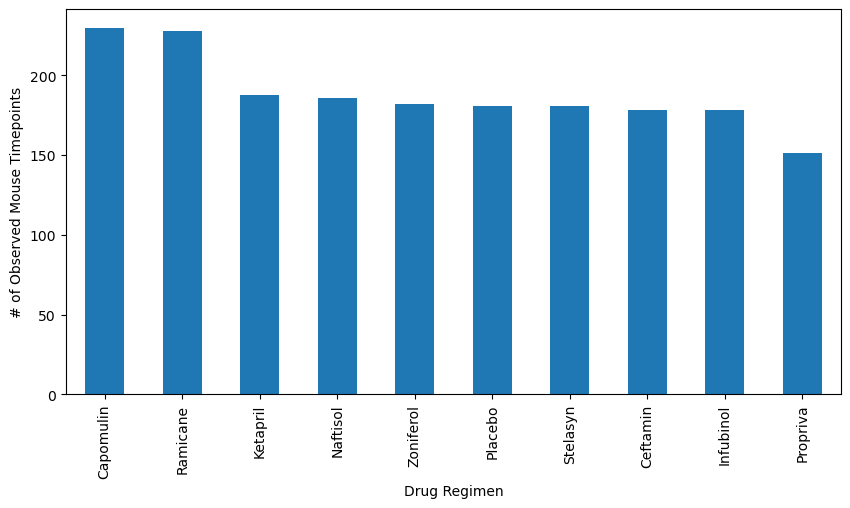

In [181]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mousetimerows = combined_mouse_study_data.groupby('Drug Regimen').size()
mousetimerows = mousetimerows.sort_values(ascending=False)

mousetimerows.plot(kind='bar', figsize=(10, 5),)


plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


plt.show()


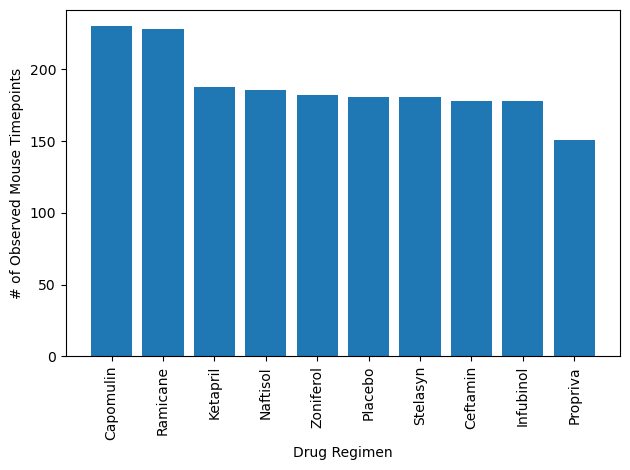

In [188]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
rowsmousetime2 = combined_mouse_study_data.groupby('Drug Regimen').size()


rowsmousetime2 = rowsmousetime2.sort_values(ascending=False)


plt.bar(rowsmousetime2.index, rowsmousetime2.values)


plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


plt.xticks(rotation=90) 
plt.tight_layout()        
plt.show()

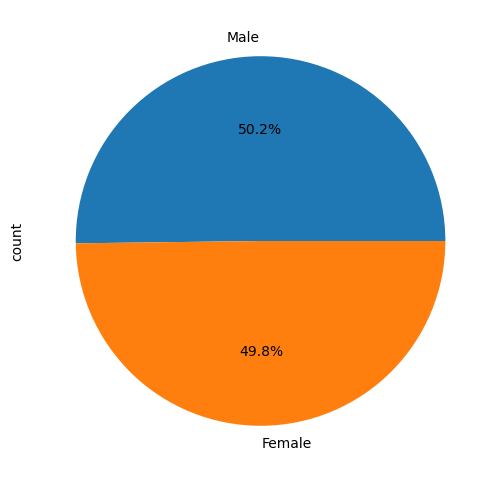

In [195]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

micepie = combined_mouse_study_data.drop_duplicates(subset='Mouse ID')

micegender = micepie['Sex'].value_counts()

micegender.plot(kind='pie', autopct='%1.1f%%', startangle=00, figsize=(8, 6))

plt.show()



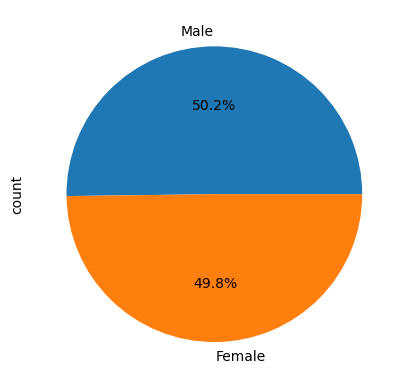

In [203]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

micepie2 = combined_mouse_study_data.drop_duplicates(subset='Mouse ID')

micegender2 = micepie2['Sex'].value_counts()

labels = micegender2.index
sizes = micegender2.values


plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)

 
plt.ylabel('count')
plt.show()


## Quartiles, Outliers and Boxplots

In [207]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_df = combined_mouse_study_data.groupby('Mouse ID').max()['Timepoint'].reset_index()

merged_tumor_vol = pd.merge(last_df, combined_mouse_study_data, on=['Mouse ID', 'Timepoint'])

final_tumor_volumes = merged_df[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]


In [208]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset


    # Determine outliers using upper and lower bounds

for treatment in treatments:
    treatment_data = merged_tumor_vol[merged_tumor_vol['Drug Regimen'] == treatment]
    final_tumor_volumes = treatment_data['Tumor Volume (mm3)']

    Q1 = final_tumor_volumes.quantile(0.25)
    Q3 = final_tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    potential_outliers = final_tumor_volumes[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    tumor_vol.append(final_tumor_volumes)



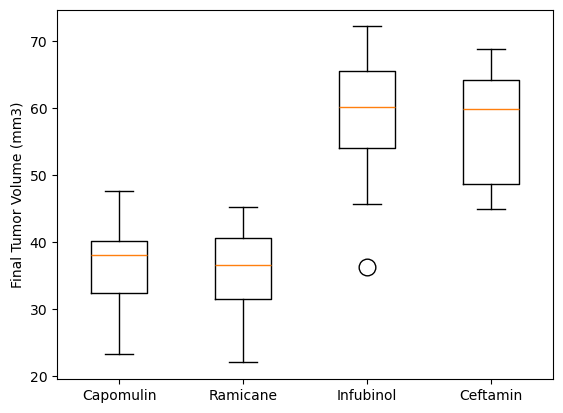

In [219]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol, labels=treatments, 
            flierprops=dict(marker='o', color='red', markersize='12'))
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

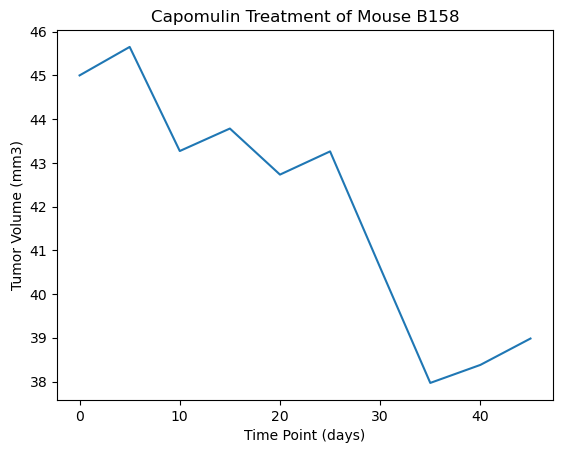

In [224]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = combined_mouse_study_data[combined_mouse_study_data['Mouse ID'] == 'b128']


plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], label='Tumor Volume')
plt.title('Capomulin Treatment of Mouse B158')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

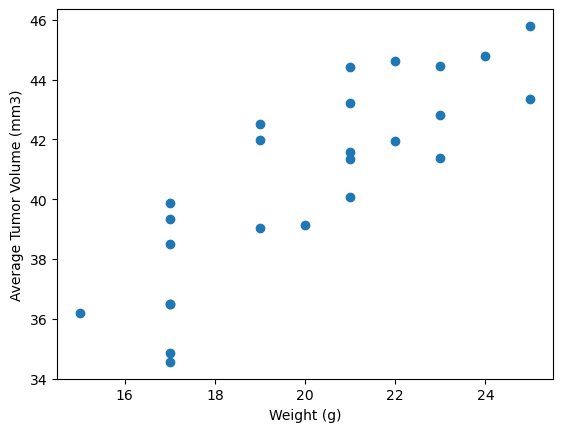

In [227]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = combined_mouse_study_data[combined_mouse_study_data['Drug Regimen'] == 'Capomulin']

mouse_weight = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()

avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

merged_weight_capomulin = pd.merge(avg_tumor_vol, mouse_weight, on='Mouse ID')

plt.scatter(merged_weight_capomulin['Weight (g)'], merged_weight_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


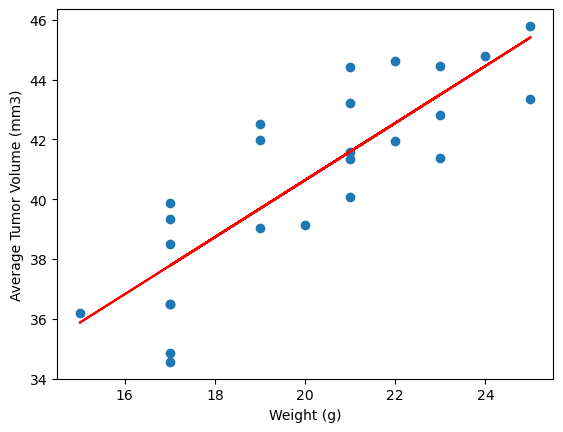

In [239]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = merged_weight_capomulin['Weight (g)'].corr(merged_weight_capomulin['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient: .2f}')

(slope, intercept, r_value, p_value, std_err) = linregress(merged_weight_capomulin['Weight (g)'], 
                                                           merged_weight_capomulin['Tumor Volume (mm3)'])

regression_line = slope * merged_weight_capomulin['Weight (g)'] + intercept
plt.scatter(merged_weight_capomulin['Weight (g)'], merged_weight_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(merged_weight_capomulin['Weight (g)'], regression_line, color='red')
plt.show()